In [42]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [43]:
def prox_g(x, mu, epsilon, bet):
    # Compute the proximal operator of g(x) = (mu/epsilon) * ||x||_1
    return np.sign(x) * np.maximum(0, np.abs(x) - bet * mu / epsilon)

def grad_h(x, delta):
    x_abs = np.abs(np.asarray(x))
    if np.isscalar(x_abs):
        if x_abs <= delta:
            grad = x
        else:
            grad = delta * np.sign(x)
    else:
        grad = np.where(x_abs <= delta, x, delta * np.sign(x))
    return grad

In [35]:
from numpy.linalg import inv
def prox_f(x, Q, c, d, bet):
    Qx = np.dot(Q, x)
    Qx_c = Qx + c
    prox_arg = x - bet * np.dot(Q.T, Qx_c)
    prox = np.linalg.inv(np.eye(Q.T.shape[0]) + bet * np.dot(Q.T, Q)) @ prox_arg
    return prox

# Example usage:
N = 100
M = 20
Q = np.random.rand(N, M)
c = np.random.rand(N, 1)
d = 0
#x = np.array([1, 1])
beta = 0.1
x = np.random.rand(M,1)


prox_result = prox_f(x, Q, c, d, beta)

In [69]:
def Alg1A(x0, bet, tol, M, N, tht = 0.0005):
    xx = x0
    vn = x0
    #tht = 0.01
    iter = 1
    kap = 0.009
    Q = np.random.randn(N, M)
    d = 0
    c = np.random.randn(N, 1)
    delta = 1e-3
    mu = 1e-3
    epsilon = 0.5
    err = [1]
    max_iter = 1000

    start_time = time.time()
    while err[-1] > tol and iter <= max_iter:
        un = 1/(1+tht)*xx + tht/(1+tht)*vn
        yn = prox_f(un, Q, c, d, bet)
        zn = prox_g(2*yn - un + bet*grad_h(yn, delta), mu, epsilon, bet)
        xxn = un + kap*(zn - yn)
        vvn = 1/(1+tht)*xxn + tht/(1+tht)*vn
        #err = np.linalg.norm(xx - xxn)**2
        err.append(np.linalg.norm(xx - xxn)**2)
        iter += 1
        xx = xxn
        vn = vvn

    end_time = time.time()
    time_taken = end_time - start_time

    return err[1:], time_taken, iter

def Alg1B(x0, bet, tol, M, N, tht = 0.05):
    xx = x0
    vn = x0
    #tht = 0.01
    iter = 1
    kap = 0.009
    Q = np.random.randn(N, M)
    d = 0
    c = np.random.randn(N, 1)
    delta = 1e-3
    mu = 1e-3
    epsilon = 0.5
    err = 1
    max_iter = 1000

    start_time = time.time()
    while err[-1] > tol and iter <= max_iter:
        un = 1/(1+tht)*xx + tht/(1+tht)*vn
        yn = prox_f(un, Q, c, d, bet)
        zn = prox_g(2*yn - un + bet*grad_h(yn, delta), mu, epsilon, bet)
        xxn = un + kap*(zn - yn)
        vvn = 1/(1+tht)*xxn + tht/(1+tht)*vn
        err.append(np.linalg.norm(xx - xxn)**2)
        iter += 1
        xx = xxn
        vn = vvn

    end_time = time.time()
    time_taken = end_time - start_time

    return err[1:], time_taken, iter - 1

def Alg1C(x0, bet, tol, M, N, tht = 0.5):
    xx = x0
    vn = x0
    #tht = 0.01
    iter = 1
    kap = 0.009
    Q = np.random.randn(N, M)
    d = 0
    c = np.random.randn(N, 1)
    delta = 1e-3
    mu = 1e-3
    epsilon = 0.5
    err = 1
    max_iter = 1000

    start_time = time.time()
    while err[-1] > tol and iter <= max_iter:
        un = 1/(1+tht)*xx + tht/(1+tht)*vn
        yn = prox_f(un, Q, c, d, bet)
        zn = prox_g(2*yn - un + bet*grad_h(yn, delta), mu, epsilon, bet)
        xxn = un + kap*(zn - yn)
        vvn = 1/(1+tht)*xxn + tht/(1+tht)*vn
        err.append(np.linalg.norm(xx - xxn)**2)
        iter += 1
        xx = xxn
        vn = vvn

    end_time = time.time()
    time_taken = end_time - start_time

    return err[1:], time_taken, iter - 1

def Alg1E(x0, bet, tol, M, N, tht = 5):
    xx = x0
    vn = x0
    #tht = 0.01
    iter = 1
    kap = 0.009
    Q = np.random.randn(N, M)
    d = 0
    c = np.random.randn(N, 1)
    delta = 1e-3
    mu = 1e-3
    epsilon = 0.5
    err = 1
    max_iter = 1000

    start_time = time.time()
    while err[-1] > tol and iter <= max_iter:
        un = 1/(1+tht)*xx + tht/(1+tht)*vn
        yn = prox_f(un, Q, c, d, bet)
        zn = prox_g(2*yn - un + bet*grad_h(yn, delta), mu, epsilon, bet)
        xxn = un + kap*(zn - yn)
        vvn = 1/(1+tht)*xxn + tht/(1+tht)*vn
        err.append(np.linalg.norm(xx - xxn)**2)
        iter += 1
        xx = xxn
        vn = vvn

    end_time = time.time()
    time_taken = end_time - start_time

    return err[1:], time_taken, iter - 1

In [148]:
M = 100
N = 25
bet = 0.04
x0 = np.random.rand(M, 1)
tol = 1e-5

In [149]:
err, time_taken, iterations = Alg1A(x0, bet, tol, M, N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet, tol, M, N, tht = 0.05)
err3, time_taken3, iterations3 = Alg1A(x0, bet, tol, M, N, tht = 0.5)
err4, time_taken4, iterations4 = Alg1A(x0, bet, tol, M, N, tht = 1)
err5, time_taken5, iterations5 = Alg1A(x0, bet, tol, M, N, tht = 5)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 0.07120537757873535
Iterations by Alg 1A: 201
Time taken by Alg 1B: 0.05320024490356445
Iterations by Alg 1B: 177
Time taken by Alg 1C: 0.04729652404785156
Iterations by Alg 1C: 206
Time taken by Alg 1D: 0.06255006790161133
Iterations by Alg 1D: 250
Time taken by Alg 1E: 0.10982036590576172
Iterations by Alg 1E: 406


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


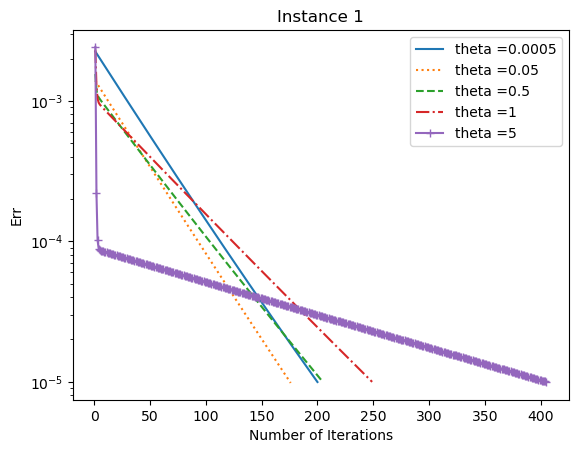

In [150]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-', label='theta =0.0005')
plt.plot(n2, err2, ':', label='theta =0.05')
plt.plot(n3, err3, '--', label='theta =0.5')
plt.plot(n4, err4, '-.', label='theta =1')
plt.plot(n5, err5, '-+', label='theta =5')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 1')
plt.savefig('ex1a1.eps', format='eps')
plt.show()

In [151]:
# Case 2:
M = 200
N = 100
bet = 0.04
x0 = np.random.rand(M, 1)
tol = 1e-5

In [152]:
err, time_taken, iterations = Alg1A(x0, bet, tol, M, N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet, tol, M, N, tht = 0.05)
err3, time_taken3, iterations3 = Alg1A(x0, bet, tol, M, N, tht = 0.5)
err4, time_taken4, iterations4 = Alg1A(x0, bet, tol, M, N, tht = 1)
err5, time_taken5, iterations5 = Alg1A(x0, bet, tol, M, N, tht = 5)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 0.2699599266052246
Iterations by Alg 1A: 227
Time taken by Alg 1B: 0.31376218795776367
Iterations by Alg 1B: 244
Time taken by Alg 1C: 0.3298056125640869
Iterations by Alg 1C: 258
Time taken by Alg 1D: 0.41518521308898926
Iterations by Alg 1D: 304
Time taken by Alg 1E: 0.6904525756835938
Iterations by Alg 1E: 579


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


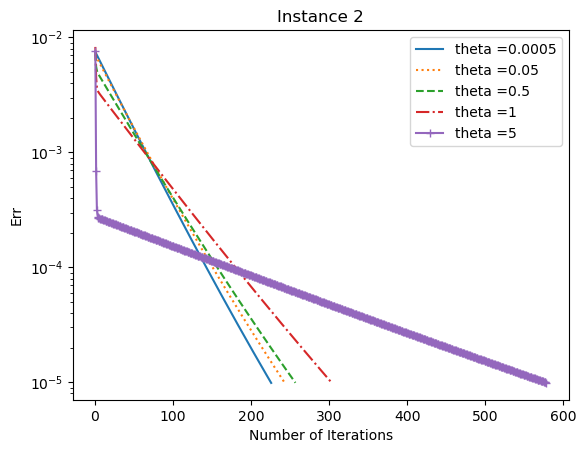

In [153]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-', label='theta =0.0005')
plt.plot(n2, err2, ':', label='theta =0.05')
plt.plot(n3, err3, '--', label='theta =0.5')
plt.plot(n4, err4, '-.', label='theta =1')
plt.plot(n5, err5, '-+', label='theta =5')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 2')
plt.savefig('ex1a2.eps', format='eps')
plt.show()

In [154]:
# Case 3:
M = 250
N = 150
bet = 0.04
x0 = np.random.rand(M, 1)
tol = 1e-5

In [155]:
err, time_taken, iterations = Alg1A(x0, bet, tol, M, N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet, tol, M, N, tht = 0.05)
err3, time_taken3, iterations3 = Alg1A(x0, bet, tol, M, N, tht = 0.5)
err4, time_taken4, iterations4 = Alg1A(x0, bet, tol, M, N, tht = 1)
err5, time_taken5, iterations5 = Alg1A(x0, bet, tol, M, N, tht = 5)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 0.2795696258544922
Iterations by Alg 1A: 253
Time taken by Alg 1B: 0.28300976753234863
Iterations by Alg 1B: 233
Time taken by Alg 1C: 0.34505510330200195
Iterations by Alg 1C: 288
Time taken by Alg 1D: 0.39994049072265625
Iterations by Alg 1D: 324
Time taken by Alg 1E: 0.8318700790405273
Iterations by Alg 1E: 622


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


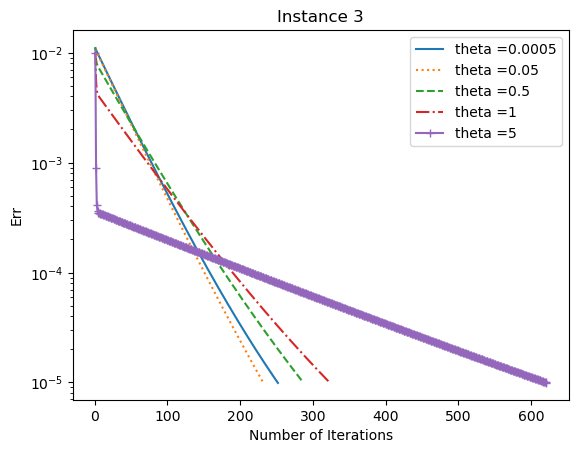

In [156]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-', label='theta =0.0005')
plt.plot(n2, err2, ':', label='theta =0.05')
plt.plot(n3, err3, '--', label='theta =0.5')
plt.plot(n4, err4, '-.', label='theta =1')
plt.plot(n5, err5, '-+', label='theta =5')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 3')
plt.savefig('ex1a3.eps', format='eps')
plt.show()

In [157]:
# Case 3:
M = 300
N = 200
bet = 0.04
x0 = np.random.rand(M, 1)
tol = 1e-5

In [158]:
err, time_taken, iterations = Alg1A(x0, bet, tol, M, N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet, tol, M, N, tht = 0.05)
err3, time_taken3, iterations3 = Alg1A(x0, bet, tol, M, N, tht = 0.5)
err4, time_taken4, iterations4 = Alg1A(x0, bet, tol, M, N, tht = 1)
err5, time_taken5, iterations5 = Alg1A(x0, bet, tol, M, N, tht = 5)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 0.595167875289917
Iterations by Alg 1A: 275
Time taken by Alg 1B: 0.557837963104248
Iterations by Alg 1B: 259
Time taken by Alg 1C: 0.6616089344024658
Iterations by Alg 1C: 311
Time taken by Alg 1D: 0.7217297554016113
Iterations by Alg 1D: 333
Time taken by Alg 1E: 1.5850310325622559
Iterations by Alg 1E: 706


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


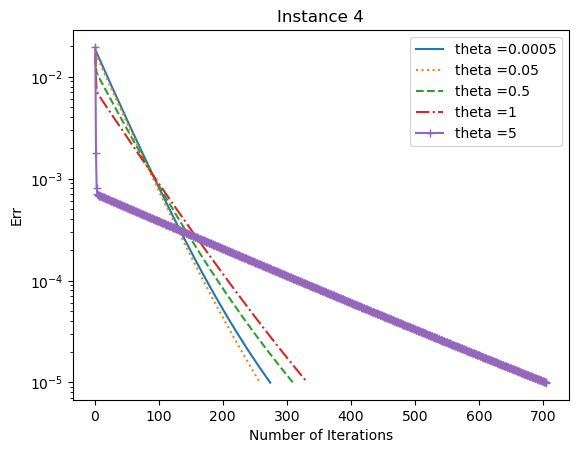

In [159]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-', label='theta =0.0005')
plt.plot(n2, err2, ':', label='theta =0.05')
plt.plot(n3, err3, '--', label='theta =0.5')
plt.plot(n4, err4, '-.', label='theta =1')
plt.plot(n5, err5, '-+', label='theta =5')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 4')
plt.savefig('ex1a4.eps', format='eps')
plt.show()

In [160]:
# Case 5:
M = 500
N = 300
bet = 0.04
x0 = np.random.rand(M, 1)
tol = 1e-5

In [161]:
err, time_taken, iterations = Alg1A(x0, bet, tol, M, N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet, tol, M, N, tht = 0.05)
err3, time_taken3, iterations3 = Alg1A(x0, bet, tol, M, N, tht = 0.5)
err4, time_taken4, iterations4 = Alg1A(x0, bet, tol, M, N, tht = 1)
err5, time_taken5, iterations5 = Alg1A(x0, bet, tol, M, N, tht = 5)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 2.7267727851867676
Iterations by Alg 1A: 242
Time taken by Alg 1B: 2.5572240352630615
Iterations by Alg 1B: 254
Time taken by Alg 1C: 2.8726871013641357
Iterations by Alg 1C: 273
Time taken by Alg 1D: 4.236835241317749
Iterations by Alg 1D: 333
Time taken by Alg 1E: 9.084716320037842
Iterations by Alg 1E: 720


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


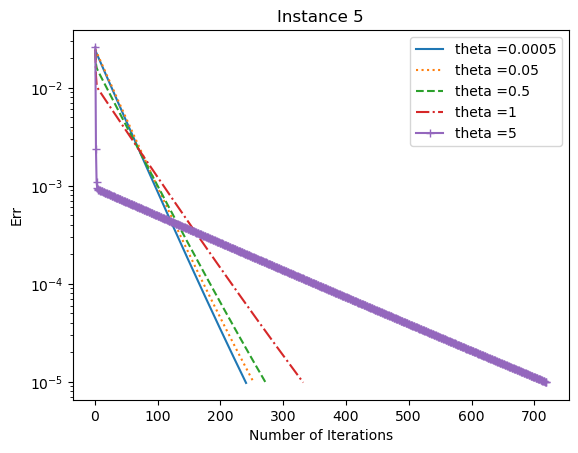

In [162]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-', label='theta =0.0005')
plt.plot(n2, err2, ':', label='theta =0.05')
plt.plot(n3, err3, '--', label='theta =0.5')
plt.plot(n4, err4, '-.', label='theta =1')
plt.plot(n5, err5, '-+', label='theta =5')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 5')
plt.savefig('ex1a5.eps', format='eps')
plt.show()

In [163]:
# Case 5:
M = 600
N = 400
bet = 0.04
x0 = np.random.rand(M, 1)
tol = 1e-5

In [164]:
err, time_taken, iterations = Alg1A(x0, bet, tol, M, N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet, tol, M, N, tht = 0.05)
err3, time_taken3, iterations3 = Alg1A(x0, bet, tol, M, N, tht = 0.5)
err4, time_taken4, iterations4 = Alg1A(x0, bet, tol, M, N, tht = 1)
err5, time_taken5, iterations5 = Alg1A(x0, bet, tol, M, N, tht = 5)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 6.167243242263794
Iterations by Alg 1A: 264
Time taken by Alg 1B: 5.837591886520386
Iterations by Alg 1B: 262
Time taken by Alg 1C: 6.889354705810547
Iterations by Alg 1C: 289
Time taken by Alg 1D: 8.601329565048218
Iterations by Alg 1D: 344
Time taken by Alg 1E: 26.605592012405396
Iterations by Alg 1E: 786


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


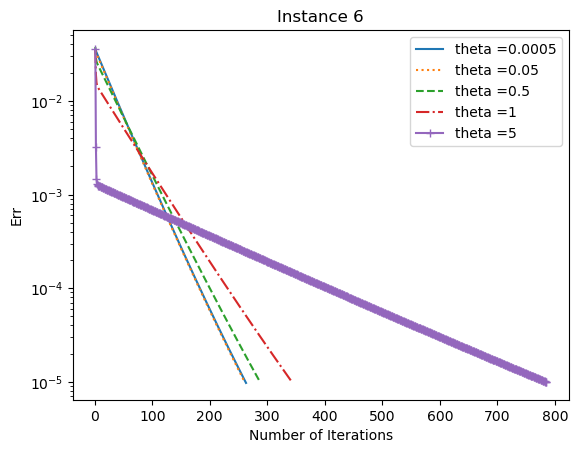

In [165]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-', label='theta =0.0005')
plt.plot(n2, err2, ':', label='theta =0.05')
plt.plot(n3, err3, '--', label='theta =0.5')
plt.plot(n4, err4, '-.', label='theta =1')
plt.plot(n5, err5, '-+', label='theta =5')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 6')
plt.savefig('ex1a6.eps', format='eps')
plt.show()

## Part 2 of Example 1:

In [125]:
M = 100
N = 25
x0 = np.random.rand(M, 1)
tol = 1e-5

In [126]:
err, time_taken, iterations = Alg1A(x0, bet = 0.0001, tol = 1e-5, M = 100, N = 25, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet = 0.001, tol = 1e-5, M = 100, N = 25, tht = 0.0005)
err3, time_taken3, iterations3 = Alg1A(x0, bet = 0.1, tol = 1e-5, M = 100, N = 25, tht = 0.0005)
err4, time_taken4, iterations4 = Alg1A(x0, bet = 1, tol = 1e-5, M = 100, N = 25, tht = 0.0005)
err5, time_taken5, iterations5 = Alg1A(x0, bet = 10, tol = 1e-5, M = 100, N = 25, tht = 0.0005)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 0.0012958049774169922
Iterations by Alg 1A: 2
Time taken by Alg 1B: 0.05841374397277832
Iterations by Alg 1B: 163
Time taken by Alg 1C: 0.037325382232666016
Iterations by Alg 1C: 162
Time taken by Alg 1D: 0.0312654972076416
Iterations by Alg 1D: 158
Time taken by Alg 1E: 0.06289958953857422
Iterations by Alg 1E: 164


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


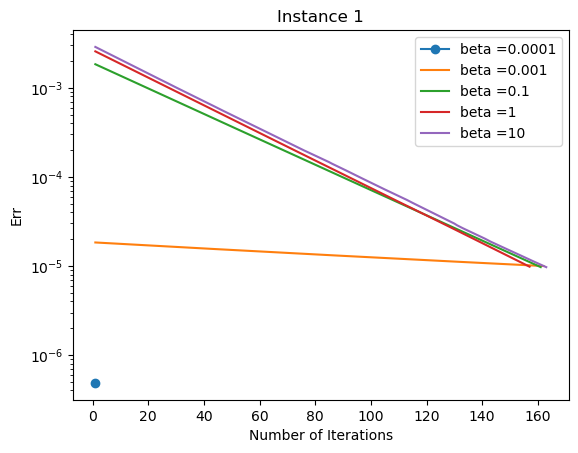

In [127]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-o', label='beta =0.0001')
plt.plot(n2, err2, '-', label='beta =0.001')
plt.plot(n3, err3, '-', label='beta =0.1')
plt.plot(n4, err4, '-', label='beta =1')
plt.plot(n5, err5, '-', label='beta =10')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 1')
plt.savefig('ex1b1.eps', format='eps')
plt.show()

In [128]:
# Case 2:
M = 200
N = 100
x0 = np.random.rand(M, 1)
tol = 1e-5

In [129]:
err, time_taken, iterations = Alg1A(x0, bet = 0.0001, tol = 1e-5, M = M, N = N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet = 0.001, tol = 1e-5, M = M, N = N, tht = 0.0005)
err3, time_taken3, iterations3 = Alg1A(x0, bet = 0.1, tol = 1e-5, M = M, N = N, tht = 0.0005)
err4, time_taken4, iterations4 = Alg1A(x0, bet = 1, tol = 1e-5, M = M, N = N, tht = 0.0005)
err5, time_taken5, iterations5 = Alg1A(x0, bet = 10, tol = 1e-5, M = M, N = N, tht = 0.0005)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 0.0020058155059814453
Iterations by Alg 1A: 2
Time taken by Alg 1B: 0.33006739616394043
Iterations by Alg 1B: 528
Time taken by Alg 1C: 0.1566450595855713
Iterations by Alg 1C: 216
Time taken by Alg 1D: 0.1415255069732666
Iterations by Alg 1D: 199
Time taken by Alg 1E: 0.12541413307189941
Iterations by Alg 1E: 203


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


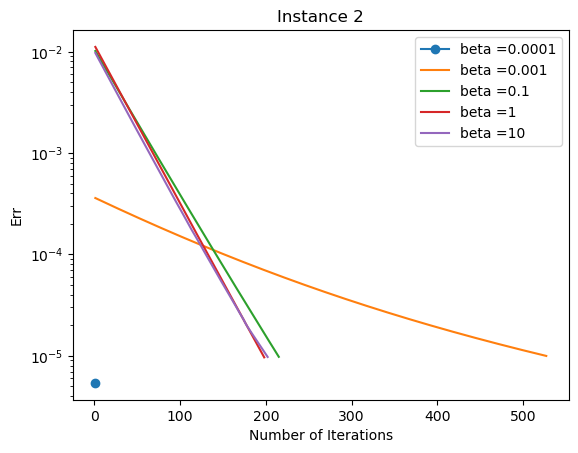

In [130]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-o', label='beta =0.0001')
plt.plot(n2, err2, '-', label='beta =0.001')
plt.plot(n3, err3, '-', label='beta =0.1')
plt.plot(n4, err4, '-', label='beta =1')
plt.plot(n5, err5, '-', label='beta =10')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 2')
plt.savefig('ex1b2.eps', format='eps')
plt.show()

In [131]:
# Case 3:
M = 300
N = 150
x0 = np.random.rand(M, 1)
tol = 1e-5

In [132]:
err, time_taken, iterations = Alg1A(x0, bet = 0.0001, tol = 1e-5, M = M, N = N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet = 0.001, tol = 1e-5, M = M, N = N, tht = 0.0005)
err3, time_taken3, iterations3 = Alg1A(x0, bet = 0.1, tol = 1e-5, M = M, N = N, tht = 0.0005)
err4, time_taken4, iterations4 = Alg1A(x0, bet = 1, tol = 1e-5, M = M, N = N, tht = 0.0005)
err5, time_taken5, iterations5 = Alg1A(x0, bet = 10, tol = 1e-5, M = M, N = N, tht = 0.0005)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 0.8984763622283936
Iterations by Alg 1A: 374
Time taken by Alg 1B: 1.2979316711425781
Iterations by Alg 1B: 554
Time taken by Alg 1C: 0.533334493637085
Iterations by Alg 1C: 214
Time taken by Alg 1D: 0.4861021041870117
Iterations by Alg 1D: 205
Time taken by Alg 1E: 0.6668224334716797
Iterations by Alg 1E: 219


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


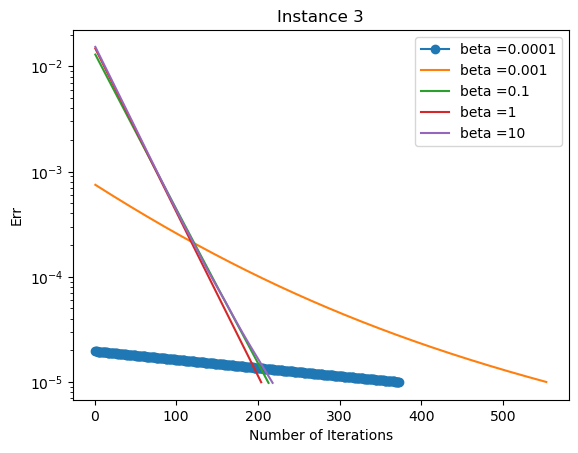

In [133]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-o', label='beta =0.0001')
plt.plot(n2, err2, '-', label='beta =0.001')
plt.plot(n3, err3, '-', label='beta =0.1')
plt.plot(n4, err4, '-', label='beta =1')
plt.plot(n5, err5, '-', label='beta =10')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 3')
plt.savefig('ex1b3.eps', format='eps')
plt.show()


In [134]:
# Case 4:
M = 300
N = 200
x0 = np.random.rand(M, 1)
tol = 1e-5

In [135]:
err, time_taken, iterations = Alg1A(x0, bet = 0.0001, tol = 1e-5, M = M, N = N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet = 0.001, tol = 1e-5, M = M, N = N, tht = 0.0005)
err3, time_taken3, iterations3 = Alg1A(x0, bet = 0.1, tol = 1e-5, M = M, N = N, tht = 0.0005)
err4, time_taken4, iterations4 = Alg1A(x0, bet = 1, tol = 1e-5, M = M, N = N, tht = 0.0005)
err5, time_taken5, iterations5 = Alg1A(x0, bet = 10, tol = 1e-5, M = M, N = N, tht = 0.0005)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 1.1677734851837158
Iterations by Alg 1A: 453
Time taken by Alg 1B: 1.7132515907287598
Iterations by Alg 1B: 611
Time taken by Alg 1C: 0.6430926322937012
Iterations by Alg 1C: 235
Time taken by Alg 1D: 0.580660343170166
Iterations by Alg 1D: 214
Time taken by Alg 1E: 0.6118841171264648
Iterations by Alg 1E: 228


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


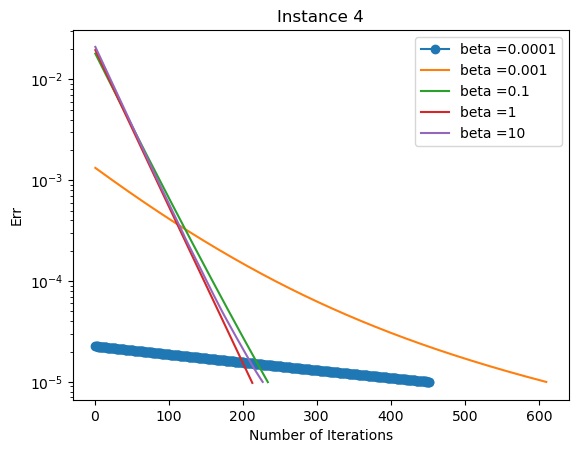

In [136]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-o', label='beta =0.0001')
plt.plot(n2, err2, '-', label='beta =0.001')
plt.plot(n3, err3, '-', label='beta =0.1')
plt.plot(n4, err4, '-', label='beta =1')
plt.plot(n5, err5, '-', label='beta =10')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 4')
plt.savefig('ex1b4.eps', format='eps')
plt.show()


In [137]:
# Case 5:
M = 500
N = 300
x0 = np.random.rand(M, 1)
tol = 1e-5

In [138]:
err, time_taken, iterations = Alg1A(x0, bet = 0.0001, tol = 1e-5, M = M, N = N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet = 0.001, tol = 1e-5, M = M, N = N, tht = 0.0005)
err3, time_taken3, iterations3 = Alg1A(x0, bet = 0.1, tol = 1e-5, M = M, N = N, tht = 0.0005)
err4, time_taken4, iterations4 = Alg1A(x0, bet = 1, tol = 1e-5, M = M, N = N, tht = 0.0005)
err5, time_taken5, iterations5 = Alg1A(x0, bet = 10, tol = 1e-5, M = M, N = N, tht = 0.0005)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 9.277104616165161
Iterations by Alg 1A: 881
Time taken by Alg 1B: 6.151157855987549
Iterations by Alg 1B: 623
Time taken by Alg 1C: 2.3229188919067383
Iterations by Alg 1C: 235
Time taken by Alg 1D: 2.276121139526367
Iterations by Alg 1D: 228
Time taken by Alg 1E: 2.9510059356689453
Iterations by Alg 1E: 247


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


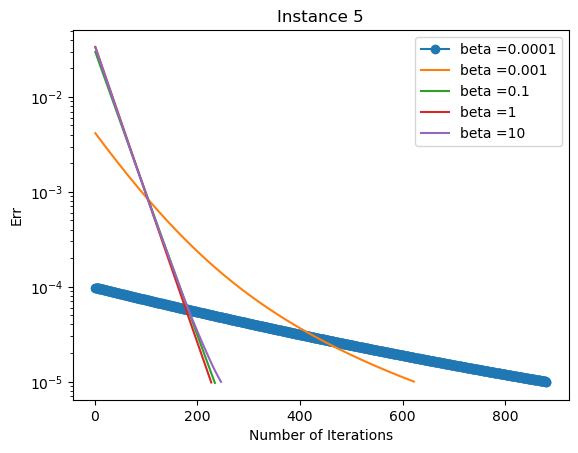

In [139]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-o', label='beta =0.0001')
plt.plot(n2, err2, '-', label='beta =0.001')
plt.plot(n3, err3, '-', label='beta =0.1')
plt.plot(n4, err4, '-', label='beta =1')
plt.plot(n5, err5, '-', label='beta =10')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 5')
plt.savefig('ex1b5.eps', format='eps')
plt.show()


In [140]:
# Case 6:
M = 600
N = 400
x0 = np.random.rand(M, 1)
tol = 1e-5

In [141]:
err, time_taken, iterations = Alg1A(x0, bet = 0.0001, tol = 1e-5, M = M, N = N, tht = 0.0005)
err2, time_taken2, iterations2 = Alg1A(x0, bet = 0.001, tol = 1e-5, M = M, N = N, tht = 0.0005)
err3, time_taken3, iterations3 = Alg1A(x0, bet = 0.1, tol = 1e-5, M = M, N = N, tht = 0.0005)
err4, time_taken4, iterations4 = Alg1A(x0, bet = 1, tol = 1e-5, M = M, N = N, tht = 0.0005)
err5, time_taken5, iterations5 = Alg1A(x0, bet = 10, tol = 1e-5, M = M, N = N, tht = 0.0005)

print("Time taken by Alg 1A:", time_taken)
print("Iterations by Alg 1A:", iterations)
print("Time taken by Alg 1B:", time_taken2)
print("Iterations by Alg 1B:", iterations2)
print("Time taken by Alg 1C:", time_taken3)
print("Iterations by Alg 1C:", iterations3)
print("Time taken by Alg 1D:", time_taken4)
print("Iterations by Alg 1D:", iterations4)
print("Time taken by Alg 1E:", time_taken5)
print("Iterations by Alg 1E:", iterations5)

Time taken by Alg 1A: 17.056796312332153
Iterations by Alg 1A: 1001
Time taken by Alg 1B: 12.683722496032715
Iterations by Alg 1B: 718
Time taken by Alg 1C: 4.848962068557739
Iterations by Alg 1C: 245
Time taken by Alg 1D: 4.206786394119263
Iterations by Alg 1D: 236
Time taken by Alg 1E: 5.335860729217529
Iterations by Alg 1E: 259


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


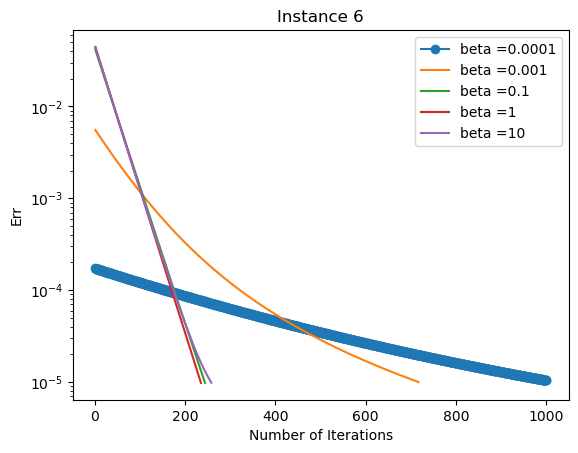

In [142]:
n = np.arange(1, len(err)+1)
n2 = np.arange(1, len(err2)+1)
n3 = np.arange(1, len(err3)+1)
n4 = np.arange(1, len(err4)+1)
n5 = np.arange(1, len(err5)+1)

plt.plot(n, err, '-o', label='beta =0.0001')
plt.plot(n2, err2, '-', label='beta =0.001')
plt.plot(n3, err3, '-', label='beta =0.1')
plt.plot(n4, err4, '-', label='beta =1')
plt.plot(n5, err5, '-', label='beta =10')

plt.xlabel('Number of Iterations')
plt.ylabel('Err')
plt.legend()
plt.yscale('log')  # Set y-axis to log scale
plt.title('Instance 6')
plt.savefig('ex1b6.eps', format='eps')
plt.show()
